In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

import sys
sys.path.append('/Users/leonardodicaterina/Desktop/Portfolio/ImageProcessing/MyLibrary')
import libreria as p

In [7]:
path2img = '/Users/leonardodicaterina/Desktop/Portfolio/ImageProcessing/Data/lego.png'
img = plt.imread(path2img)

In [8]:
img.shape

(256, 256, 4)

In [9]:
data = np.sum(img, axis = -1)
Dim = data.shape
logDim = int (m.log(Dim[-1],2))
print("shape of the image: {p1} and the logarithm is: {p2} ".format(p1 = Dim, p2 = logDim))


shape of the image: (256, 256) and the logarithm is: 8 


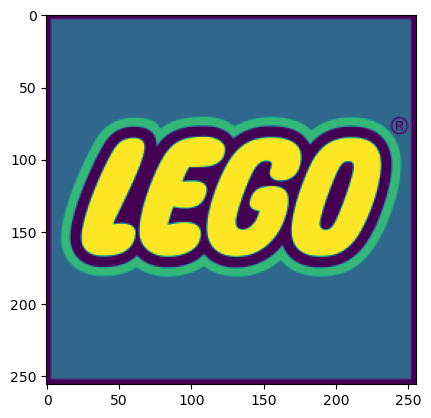

In [10]:
plt.imshow(data)

# Hadamard transfomation

The Hadamard transform essentially changes the basis in which we represent an image. By using a complete set of orthogonal Walsh functions, we can transform the image data into a new space where the coefficients represent the **contribution** of each basis function to the original image.

This allows to separate the coefficents that don't bring information trough a lossy compression


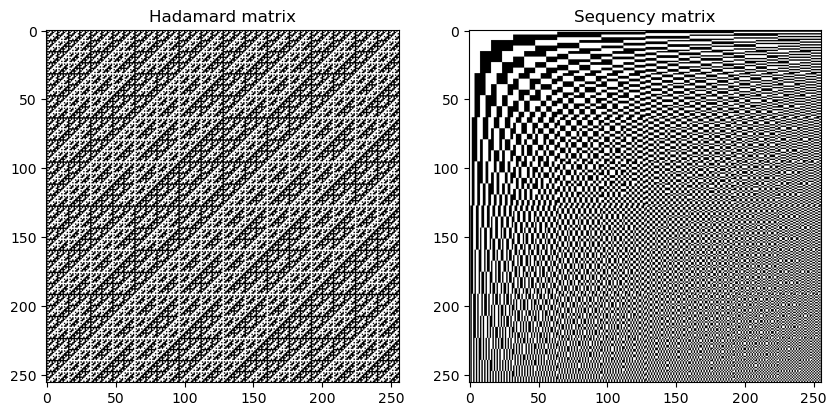

In [11]:
Hadamard = p.Hadamard(logDim)
Sequency = p.Sequency(logDim)

# show the Hadamard matrix and the sequency matrix side by side
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(Hadamard, cmap = 'gray')
ax[0].set_title('Hadamard matrix')
ax[1].imshow(Sequency, cmap = 'gray')
ax[1].set_title('Sequency matrix')
plt.show()


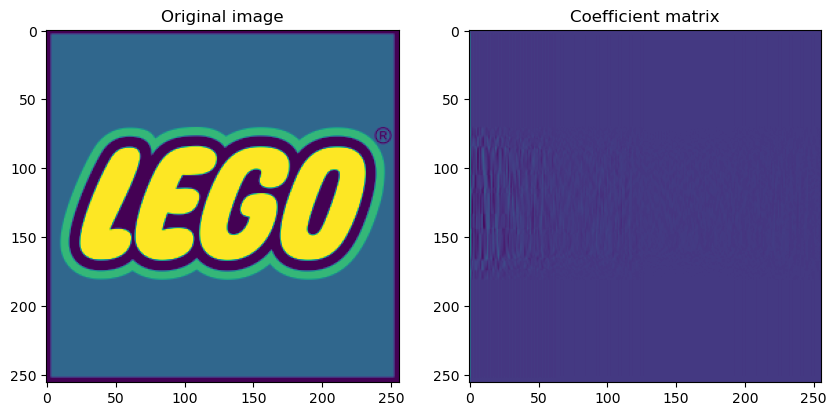

In [12]:
coefficentMatrix = np.array(data,dtype = float)
coefficentMatrix = np.dot(data,Sequency)/256

#show the image and the coefficient matrix
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(data)
ax[0].set_title('Original image')
ax[1].imshow(coefficentMatrix)
ax[1].set_title('Coefficient matrix')
plt.show()

## The coefficent matrix

As stated before, the distribution of the coefficent value is not homogeneous, and most of them are concentrated arownd zero

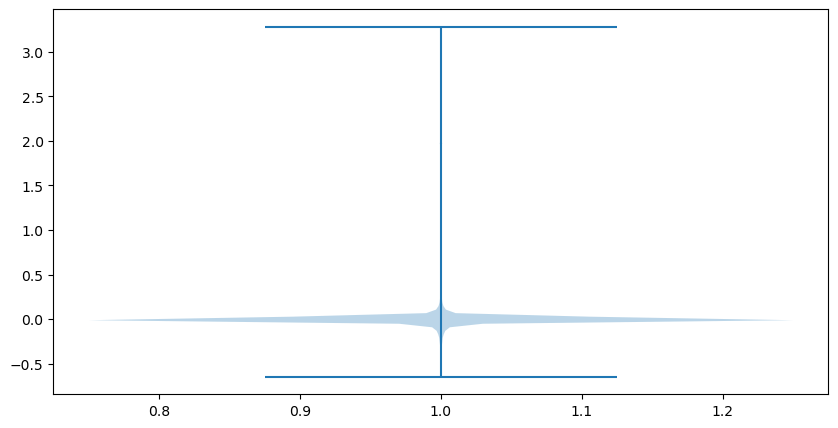

In [13]:
#violin plot of the coefficient matrix
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.violinplot(coefficentMatrix.flatten())
plt.show()

# Build Back 100% Image 

if we want to build the full image we just need to apply the transformation once again

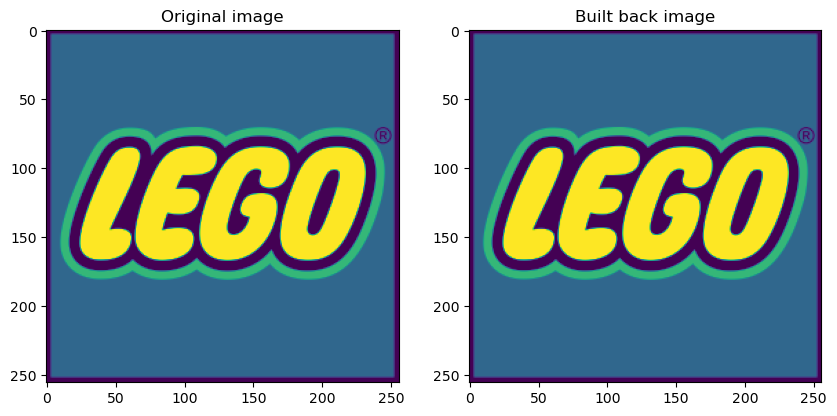

The Mean Square Error is: 0.0 and the Peak Signal to Noise Ratio is: 100


In [14]:
builtBack = np.dot(coefficentMatrix,Sequency)

#show the original image and the built back image
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(data)
ax[0].set_title('Original image')
ax[1].imshow(builtBack)
ax[1].set_title('Built back image')
plt.show()

mse_builtback = p.MSE(data,builtBack)
psnr_builtback = p.PSNR(data,builtBack)
print("The Mean Square Error is: {p1} and the Peak Signal to Noise Ratio is: {p2}".format(p1 = mse_builtback, p2 = psnr_builtback))

# Posterior Compression
if want though, we can take out the smallest coefficents and see how much we can compress the image (whe will use MSE and PSNR to express the noise after the compression)

 we have se the treshold at: 0.030560660641640425 (percentile: 85) 
 The Mean Square Error is: 0.02913891780269919 
 the Peak Signal to Noise Ratio is: 28.31780035918742


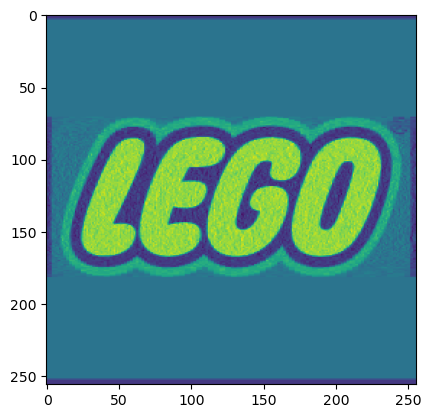

In [15]:
absCoefficentMatrix = abs(coefficentMatrix)
compressed20 = np.array(coefficentMatrix)
perc =  85 # @param {type:"slider", min:0, max:100, step:1}
treshold = np.percentile(absCoefficentMatrix, perc)

compressed20 [absCoefficentMatrix < treshold ] = 0
BuiltBackImage20 = np.dot(compressed20,Sequency)
plt.imshow(BuiltBackImage20)

MSE = p.MSE(BuiltBackImage20,data)
PSNR = p.PSNR(BuiltBackImage20,data)
print(" we have se the treshold at: {p1} (percentile: {p2}) \n The Mean Square Error is: {p3} \n the Peak Signal to Noise Ratio is: {p4}".format(p1 = treshold, p2 = perc, p3 = MSE, p4 = PSNR))

## Information Loss Quantification 

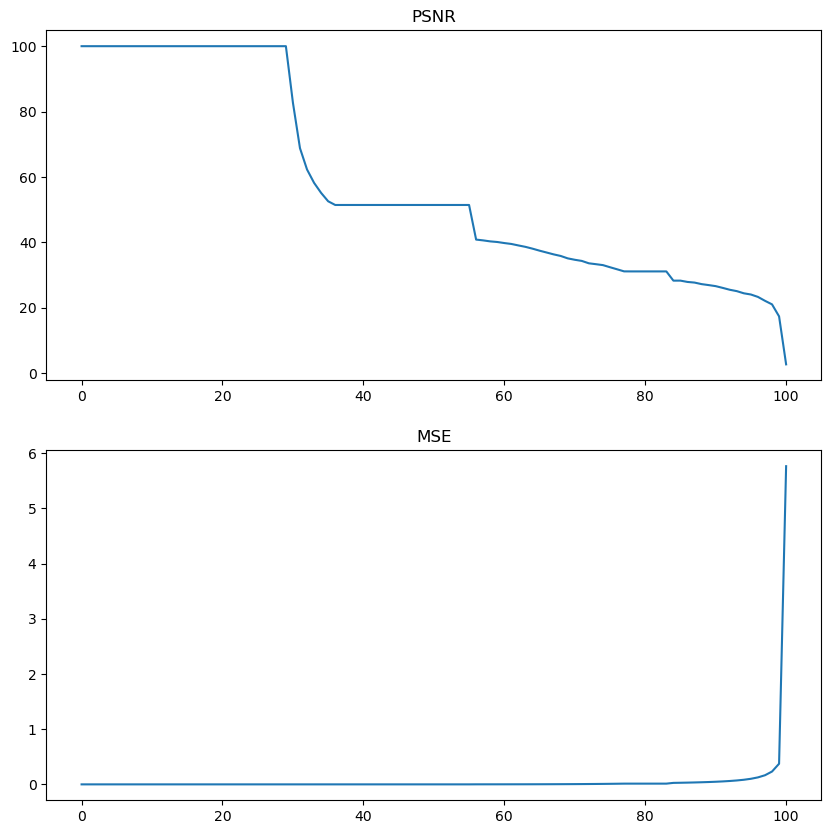

In [16]:
absCoefficentMatrix = abs(coefficentMatrix)
psnr_compressions = []
mse_compressions = []
for perc in range(0,101):
    compressed = np.array(coefficentMatrix)
    treshold = np.percentile(absCoefficentMatrix, perc)
    compressed [absCoefficentMatrix < treshold ] = 0
    BuiltBackImage = np.dot(compressed,Sequency)
    MSE = p.MSE(BuiltBackImage,data)
    PSNR = p.PSNR(BuiltBackImage,data)
    psnr_compressions.append(PSNR)
    mse_compressions.append(MSE)

fig, ax = plt.subplots(2,1, figsize = (10,10))
ax[0].plot(range(0,101),psnr_compressions)
ax[0].set_title('PSNR')
ax[1].plot(range(0,101),mse_compressions)
ax[1].set_title('MSE')

plt.show()



# Single Pixel Camera Sampling Simulation
In a live sampling situation though, we don't have the full knowledge of the coefficent population, and we don't know the relative importance of the image.

We can only track the noise reduction troughout the sampling and stop when we are satisfied 

## With Hadamard Matrix

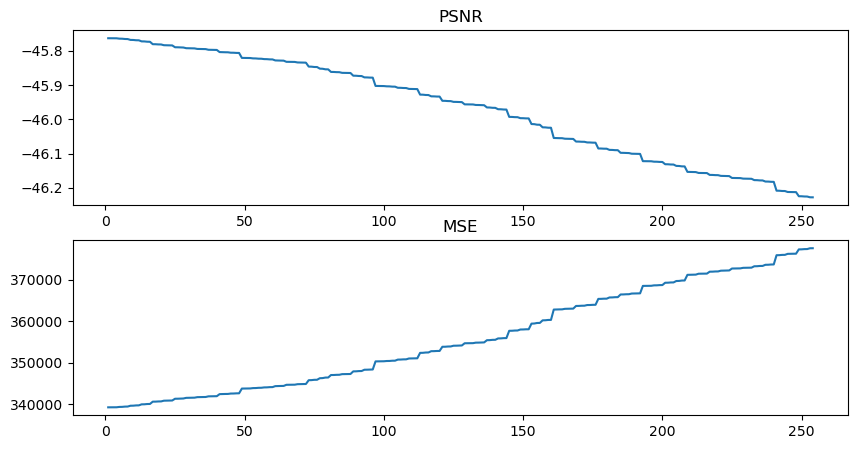

In [17]:
TransformationMatrix = p.Hadamard(logDim)
mse_Hadamard_builtback = []
psnr_Hadamard_builtback = []
for _i in range(1,255):
  ReducedTransformationMatrix =  np.array(TransformationMatrix[:,:_i])
  ReducedcoefficentMatrix = np.array(data,dtype = float)
  ReducedcoefficentMatrix = np.dot(data,ReducedTransformationMatrix)
  BuiltBackImageReduced = np.dot(ReducedcoefficentMatrix,np.transpose(ReducedTransformationMatrix))
  mse = p.MSE(data,BuiltBackImageReduced)
  mse_Hadamard_builtback.append(mse)
  psnr = p.PSNR(data,BuiltBackImageReduced)
  psnr_Hadamard_builtback.append(psnr)

fig, ax = plt.subplots(2,1, figsize = (10,5))
ax[0].plot(range(1,255),psnr_Hadamard_builtback)
ax[0].set_title('PSNR')

ax[1].plot(range(1,255),mse_Hadamard_builtback)
ax[1].set_title('MSE')
plt.show()

  


## With Sequency Matrix

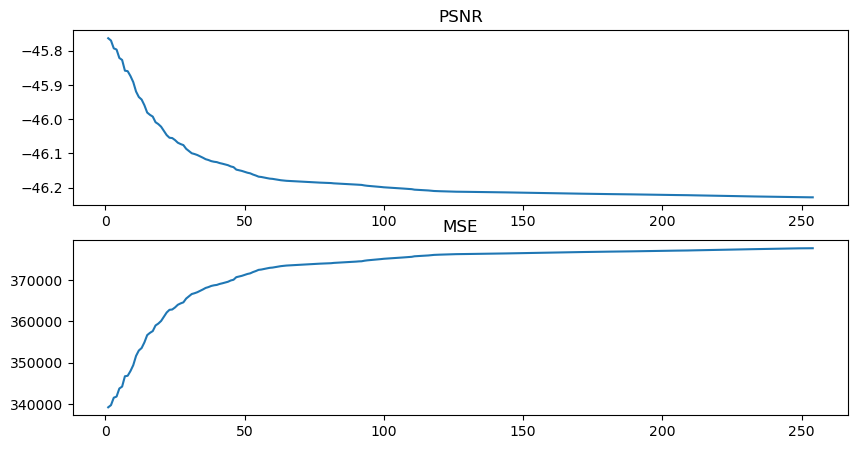

In [18]:
TransformationMatrix = p.Sequency(logDim)
mse_Hadamard_builtback = []
psnr_Hadamard_builtback = []
for _i in range(1,255):
  ReducedTransformationMatrix =  np.array(TransformationMatrix[:,:_i])
  ReducedcoefficentMatrix = np.array(data,dtype = float)
  ReducedcoefficentMatrix = np.dot(data,ReducedTransformationMatrix)
  BuiltBackImageReduced = np.dot(ReducedcoefficentMatrix,np.transpose(ReducedTransformationMatrix))
  mse = p.MSE(data,BuiltBackImageReduced)
  mse_Hadamard_builtback.append(mse)
  psnr = p.PSNR(data,BuiltBackImageReduced)
  psnr_Hadamard_builtback.append(psnr)

fig, ax = plt.subplots(2,1, figsize = (10,5))
ax[0].plot(range(1,255),psnr_Hadamard_builtback)
ax[0].set_title('PSNR')

ax[1].plot(range(1,255),mse_Hadamard_builtback)
ax[1].set_title('MSE')
plt.show()

## why is the noise reduction different?
Both of the matrices are ordered and complete representation of the same space, but the order changes! This mean that the same spatial datum is acquired in different moments of the sampling and the efficnency is problem dependent.

## With A scrambled Matrix
to make the sampling more predictable we can scramble the matrices and eaven out the probability of a spatial data to be picked during the sampling

### Scrambled Sequency

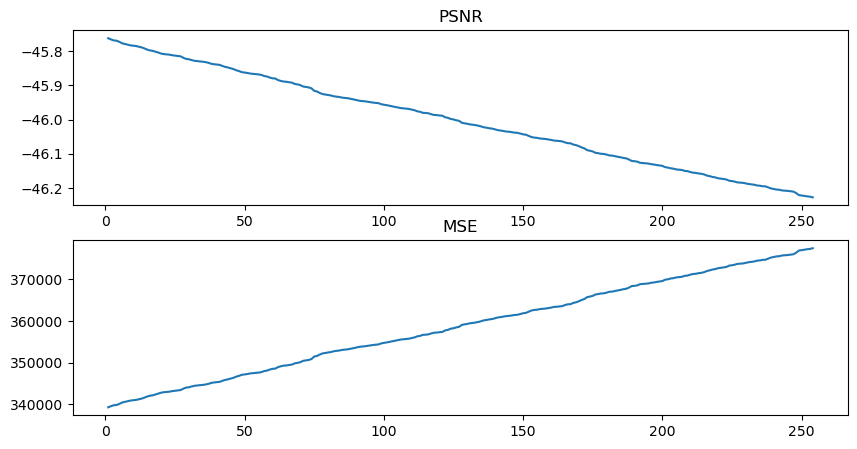

In [19]:
TransformationMatrix = p.Sequency(logDim)
# scramble the rows of the transformation matrix
np.random.shuffle(TransformationMatrix)
mse_Scrambled_builtback = []
psnr_Scrambled_builtback = []
for _i in range(1,255):
  ReducedTransformationMatrix =  np.array(TransformationMatrix[:,:_i])
  ReducedcoefficentMatrix = np.array(data,dtype = float)
  ReducedcoefficentMatrix = np.dot(data,ReducedTransformationMatrix)
  BuiltBackImageReduced = np.dot(ReducedcoefficentMatrix,np.transpose(ReducedTransformationMatrix))
  mse = p.MSE(data,BuiltBackImageReduced)
  mse_Scrambled_builtback.append(mse)
  psnr = p.PSNR(data,BuiltBackImageReduced)
  psnr_Scrambled_builtback.append(psnr)

fig, ax = plt.subplots(2,1, figsize = (10,5))
ax[0].plot(range(1,255),psnr_Scrambled_builtback)
ax[0].set_title('PSNR')

ax[1].plot(range(1,255),mse_Scrambled_builtback)
ax[1].set_title('MSE')
plt.show()

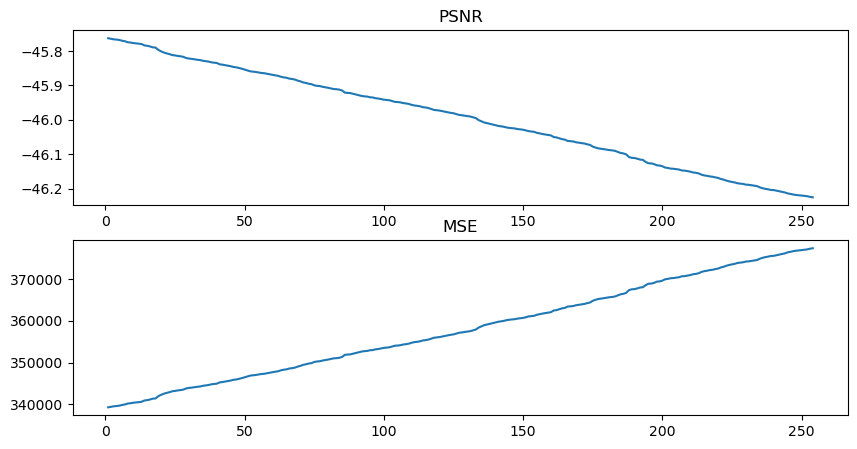

In [20]:
TransformationMatrix = p.Hadamard(logDim)
# scramble the rows of the transformation matrix
np.random.shuffle(TransformationMatrix)
mse_Scrambled_builtback = []
psnr_Scrambled_builtback = []
for _i in range(1,255):
  ReducedTransformationMatrix =  np.array(TransformationMatrix[:,:_i])
  ReducedcoefficentMatrix = np.array(data,dtype = float)
  ReducedcoefficentMatrix = np.dot(data,ReducedTransformationMatrix)
  BuiltBackImageReduced = np.dot(ReducedcoefficentMatrix,np.transpose(ReducedTransformationMatrix))
  mse = p.MSE(data,BuiltBackImageReduced)
  mse_Scrambled_builtback.append(mse)
  psnr = p.PSNR(data,BuiltBackImageReduced)
  psnr_Scrambled_builtback.append(psnr)

fig, ax = plt.subplots(2,1, figsize = (10,5))
ax[0].plot(range(1,255),psnr_Scrambled_builtback)
ax[0].set_title('PSNR')

ax[1].plot(range(1,255),mse_Scrambled_builtback)
ax[1].set_title('MSE')
plt.show()

now the results are basically the same